# Basic plotting with Makie

This block serves as a tini-tiny introduction to plotting in Julia using [Makie](https://docs.makie.org/stable/), which has to be the best plotting framework out there _in any programming language_ (personal opinion).

Makie offers several plotting backends, but for the purpose of this tutorial we will use its Cairo backend, focused on 2D publication quality graphics.

Makie is an "external package"; it is not installed with Julia. New Julia packages are installed using Julia's package manager. This itself is a package for the Julia language, so we need to learn how to use it first!

## Environments and installing packages

One way one "imports" a package into scope is with `import`:

In [1]:
import Pkg # the package manager of Julia is a package itself

This is the same as Python's `import`: it brings a package into scope, but none of its functions are accessible from the top level. They need to be prefaced with the package name and dot `.`. For example:

In [2]:
Pkg.add

add (generic function with 7 methods)

Before installing any packages, we will first activate a dedicated _environment_: a "space" Julia will add packages to. This environment will simply be the main directory of the workshop repository (one up from the directory where this notebook is stored.)

In [3]:
Pkg.activate(joinpath(@__DIR__, "..")) # `@__DIR__` always gives the directory of where it was run

  Activating project at `~/documents/presentations/IntroductionToJulia-API-2025`


We can examine the packages in the environment by running `Pkg.status`

In [4]:
Pkg.status()

Status `~/documents/presentations/IntroductionToJulia-API-2025/Project.toml`
  [6e4b80f9] BenchmarkTools v1.6.0
  [a134a8b2] BlackBoxOptim v0.6.3
⌃ [13f3f980] CairoMakie v0.12.18
  [a93c6f00] DataFrames v1.7.0
  [31c24e10] Distributions v0.25.117
  [fa6b7ba4] DualNumbers v0.6.9
  [0987c9cc] MonteCarloMeasurements v1.4.0
  [b1df2697] OrdinaryDiffEqTsit5 v1.1.0
  [1a8c2f83] Query v1.0.0
  [1e83bf80] StaticArraysCore v1.4.3
  [0c5d862f] Symbolics v6.24.0
  [1986cc42] Unitful v1.22.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


Now, if you have setup this notebook as instructed, by cloning the entire Julia Zero2Hero repository and following the installation instructions, then there is already a list of packages. These are the packages (and their versions) that are used in the Julia Zero2Hero tutorial. If you have only downloaded the Jupyter notebook by itself, the above environment will be empty! 

To add a new package to the environment we use the `add` function.
The simplest way to install new packages is by its name. 
Julia has an extensive list of cutting edge packages that you can explore in a categorized format in [juliapackages.com](https://juliapackages.com/)! Once you have the name, you can simply call `Pkg.add("Name")`.

In [5]:
Pkg.add("CairoMakie")

   Resolving package versions...
  No Changes to `~/documents/presentations/IntroductionToJulia-API-2025/Project.toml`
  No Changes to `~/documents/presentations/IntroductionToJulia-API-2025/Manifest.toml`


Now, if you setup this tutorial material as instructed, the command above will not have done anything because you have already run the file `install_and_compile.jl` which would have installed for you all the packages in the Zero2Hero environment!
Otherwise, this command will have installed CairoMakie for you!

To use a package, you would typically prefer `using PackageName` over `import`. `using` brings into scope all functions that the package _chooses_ to publicly export. The reason that in Julia you almost always use `using` instead of `import` (unlike e.g., in Python) will become clear in the block on multiple dispatch. 

For now, let's simply do:

In [6]:
using CairoMakie

This brings functions from this package into your current working scope. For example

In [7]:
lines # this function didn't exist before `using CairoMakie`

lines (generic function with 2 methods)

## Initializing plots

_before going through the plotting tutorial we'll quickly change the default figure and size for easier visualization in a zoomed-in Jupyter notebook; themeing will not actually be discussed in this brief introduction_

In [8]:
update_theme!(size = (500, 300), fontsize = 16)

Alright, the most straight-forward usage of Makie is to directly call one of the plotting functions, like `lines, scatter, barplot, ...` giving in the x and y coordinates of data to be plotted.

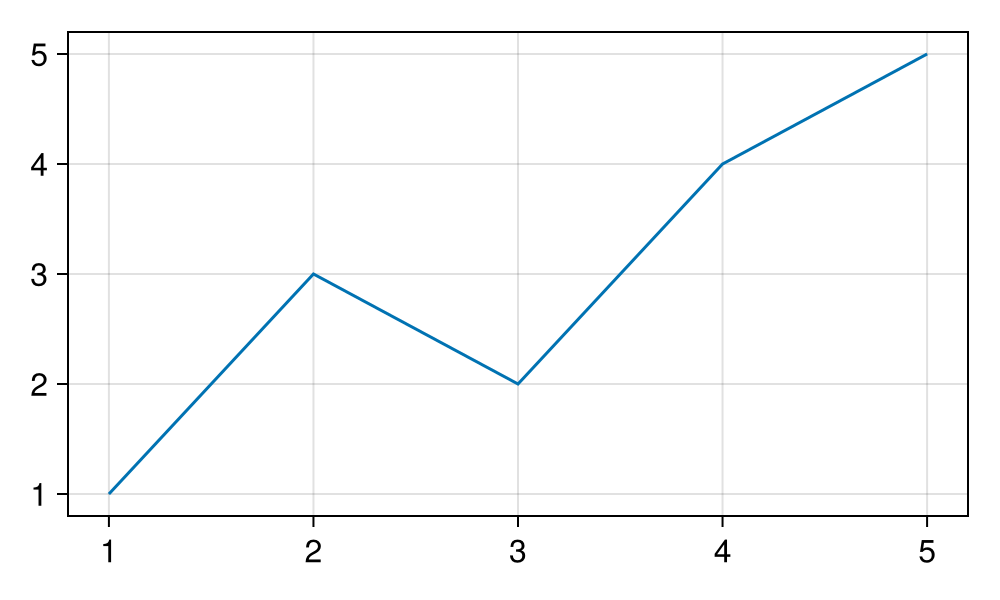

In [9]:
x = 1:5
y = [1, 3, 2, 4, 5]
fig, ax, plot_object = lines(x, y)

These plotting functions return three values. `fig` is a `Figure` object, which is the overarching figure that everything else is contained in. `ax` is an `Axis` object, which is a window with coordinates, labels, tickmarks, etc., in which data are visualized. The third output is the specific plot object (here a `Lines` object) for which we do not care about at the moment.

In any case, this all means that when we called `lines(...)` the function did a lot of things: it initialized a figure, it initialized an axis in that figure, and then line-plotted some data. This also means that `lines` and similar functions never update existing plots (which is contrary to the default behavior of e.g. the Python library `matplotlib`):

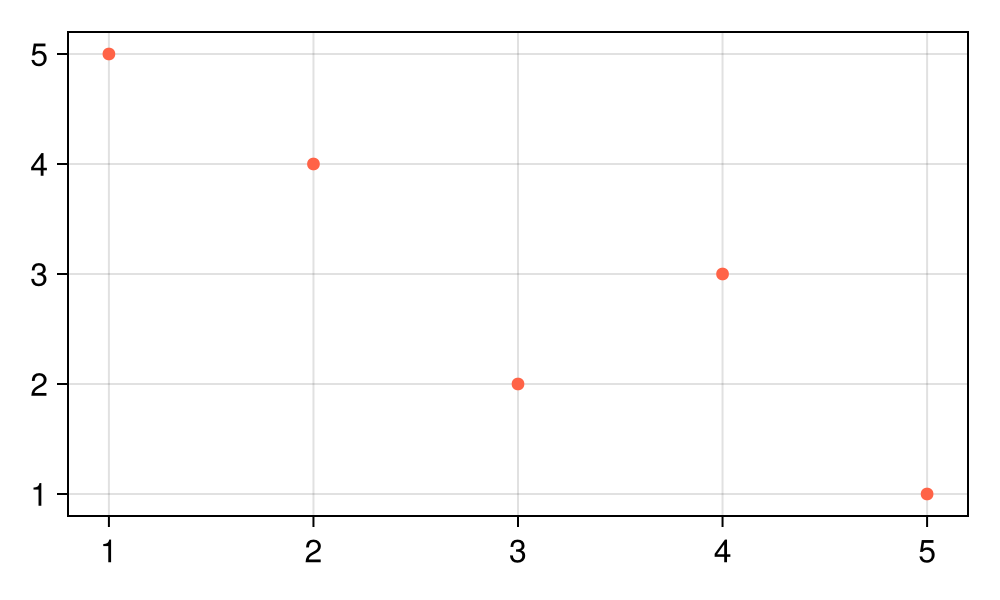

In [10]:
z = reverse(y)
scatter(x, z; color = "tomato") # makes a new plot!

To update an existing plot, you need to call the **in-place**, or **mutating**, version of the plotting functions, i.e., the version ending in `!`, giving it the axis to plot in (if not given, the last-used axis is used)

In [11]:
fig, ax, plot_object = lines(x, y)
scatter!(ax, x, z; color = "tomato")

Scatter{Tuple{Vector{Point{2, Float64}}}}

Ops!? what happened here? Why is there no plot? It's because the return value of `scatter!` isn't a figure, but rather just the plot object, since `scatter!` doesn't initialize a figure. We need to explicitly return the figure as the return value of the code block for it to be displayed:

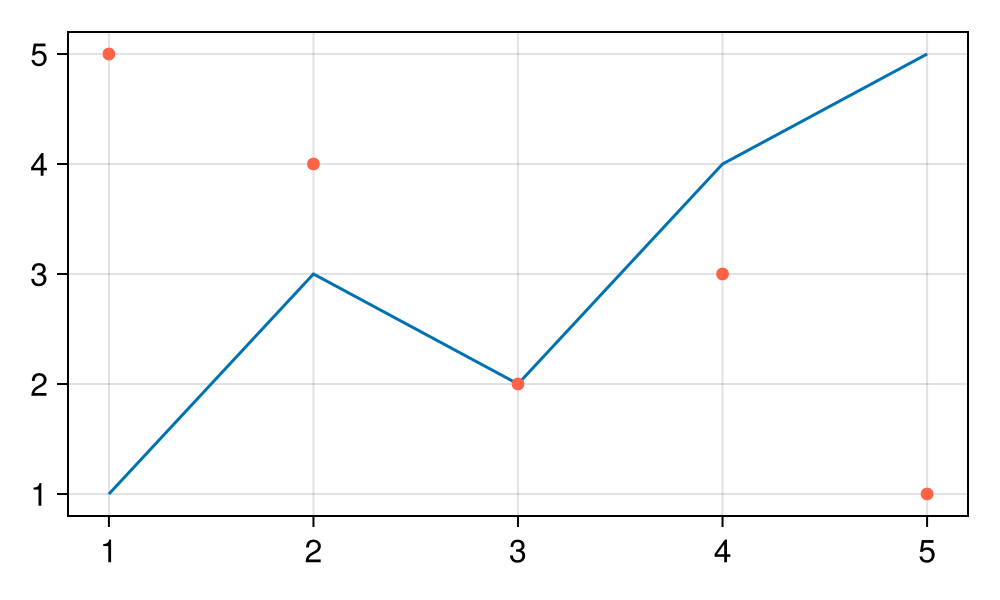

In [12]:
fig

We won't really get into too much detail of the options each plotting function has; they are several dozens, line width, marker style, size, color, fill, and many, many others. They are provided as **keyword arguments** to the plotting functions, e.g., `lines(x, y; color = "purple", linewidth = 2)`. Best to check the online documentation of Makie, or the docstring of the functions, for details on all these options.

What is important to know however, is that all of these options can be vectors, just like the input data. E.g., if you'd like each marker to have a different size, you'd just pass the vector of sizes as the `markersize` attribute (and similarly with color, width, and everything else).

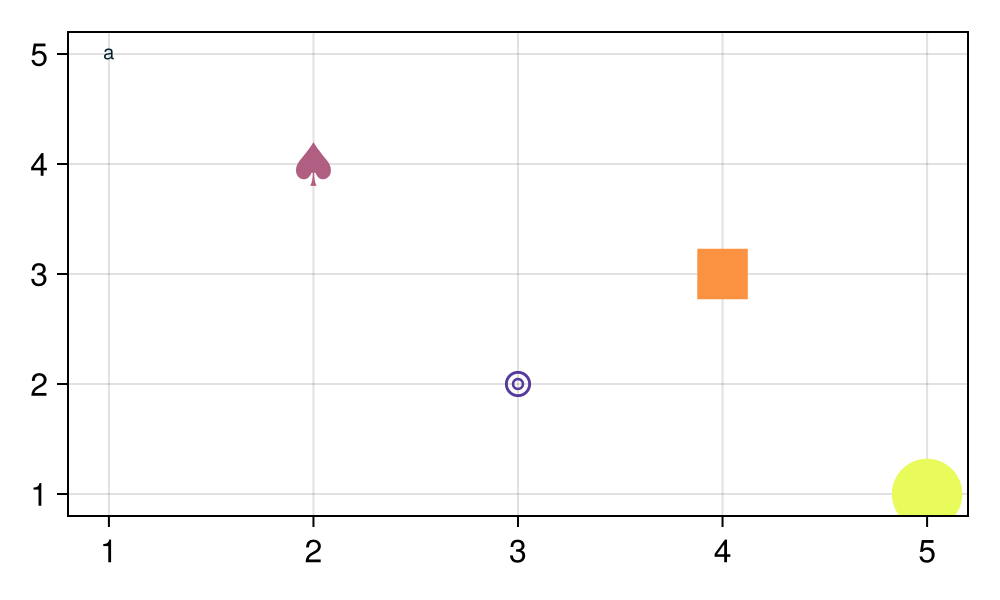

In [13]:
scatter(x, z;
    markersize = 10y, color = y, colormap = "thermal",
    marker = ['a', '♠', '⊚', :rect, :circle]
)

## Layouting axes in figures

One of the strongest features of Makie is its layouting system, that allows you to create sub-panels of figures with as much ease as it is saying where an axis should be in normal English.

To add an axis to a figure, you simply initialize the axis at the expected location using the intuitive **matrix indexing syntax**: `fig[row, col]`. I.e., you imagine the figure to be a "matrix of axes" and add an axis at the given row and column.

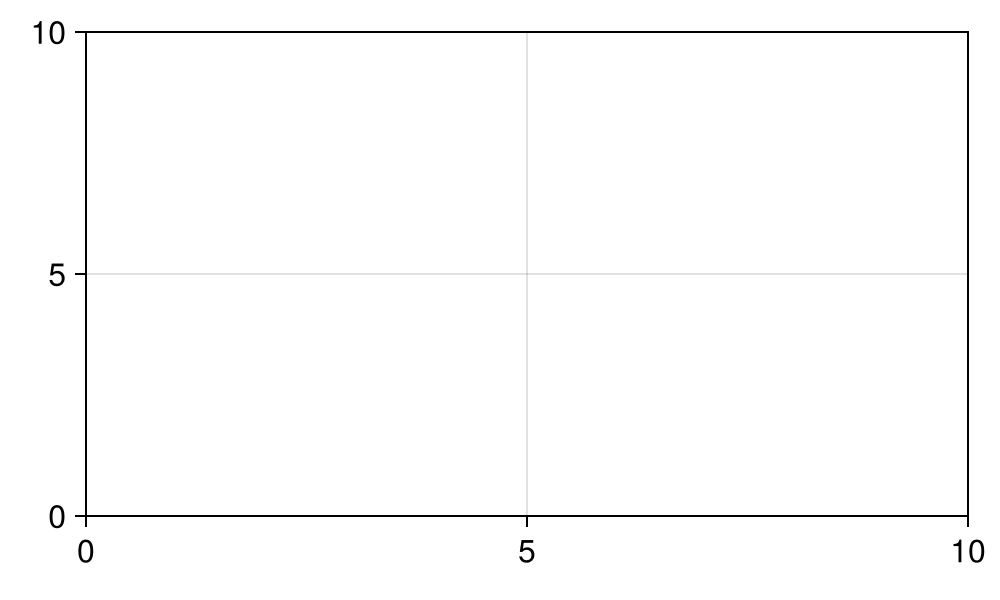

In [14]:
fig = Figure() # initialize a figure with default settings
# create an Axis into `fig[1,1]`, and keep track of it in a variable!
ax1 = Axis(fig[1,1])
# i.e., give the location of the axis directly in the `Axis` constructor!
fig # don't forget to return the figure for it to be plotted!

we now add another axis in the second "column"

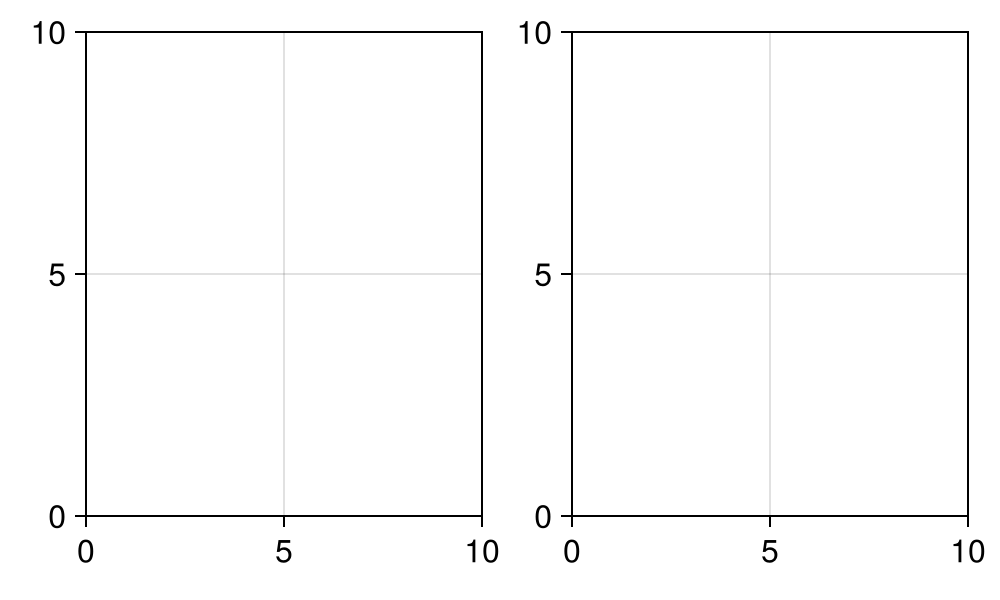

In [15]:
ax2 = Axis(fig[1,2])
fig

Makie's automatic layouting capabilities make everything fit and be the correct size given the figure size constrain!

Furthermore, they understand the dimensional extent of the "matrix of axis" even without it being yet full of axes:

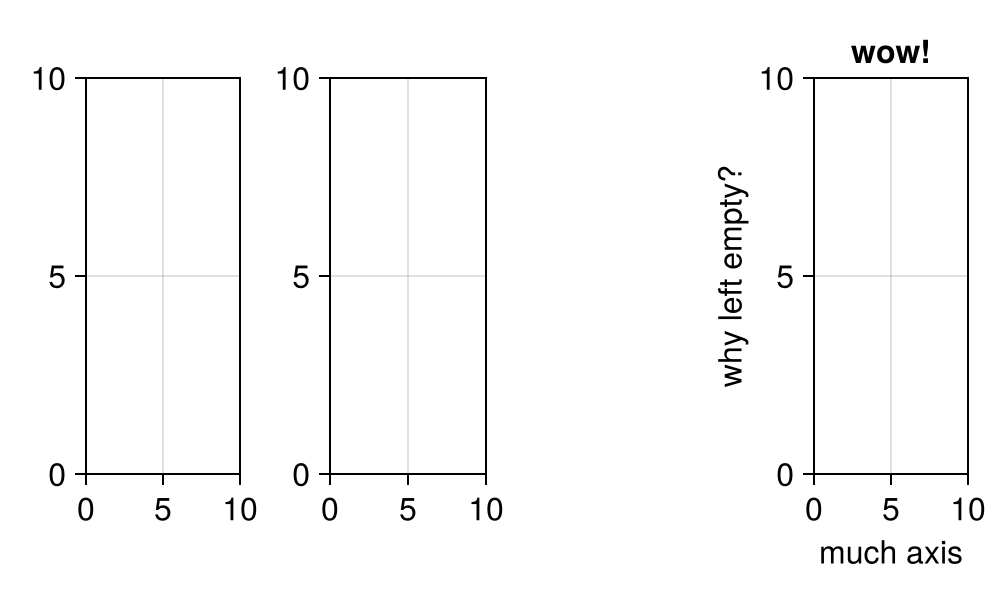

In [16]:
ax4 = fig[1,4] = Axis(fig;
    # This is the way to adjust axis properties during creation:
    title = "wow!",
    xlabel = "much axis",
    ylabel = "why left empty?"
)
fig

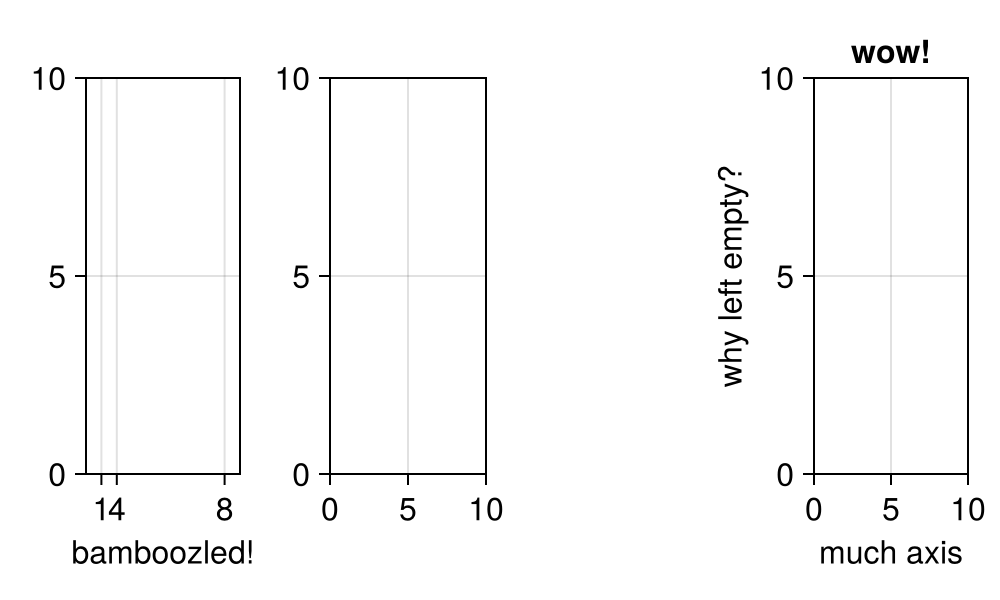

In [17]:
# and this way you adjust axis properties after creation:
ax1.xticks = ([1,2,9], ["1", "4", "8"]) # ticks and their labels
ax1.xlabel = "bamboozled!"
fig

Not only that, but just like normal matrices, one could utilize the syntax `fig[col, row]` using _ranges_, such as `1:2`. For example, we could specify an axis to span a range of 2, or 3 "positions" in the "grid of axes" that the figure represents:

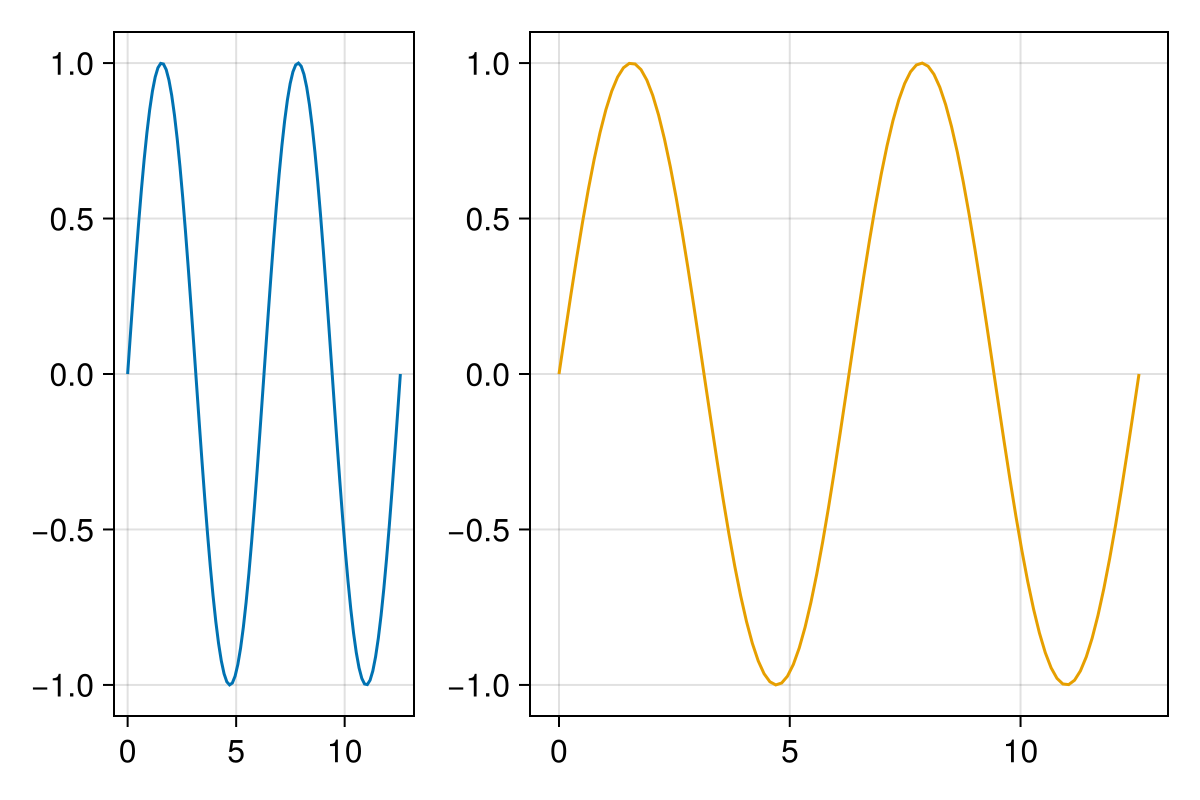

In [18]:
x = range(0, 4π; length = 100)
y = sin.(x)

fig = Figure(size = (600, 400))

# notice that we can call plotting functions directly on figure indices
# if we do not care about storing the created axes for later use!
# (we therefore use the non-`!` version, so that an axes is created)
lines(fig[1, 1], x, y, color = Cycled(1))
lines(fig[1, 2:3], x, y, color = Cycled(2))

fig

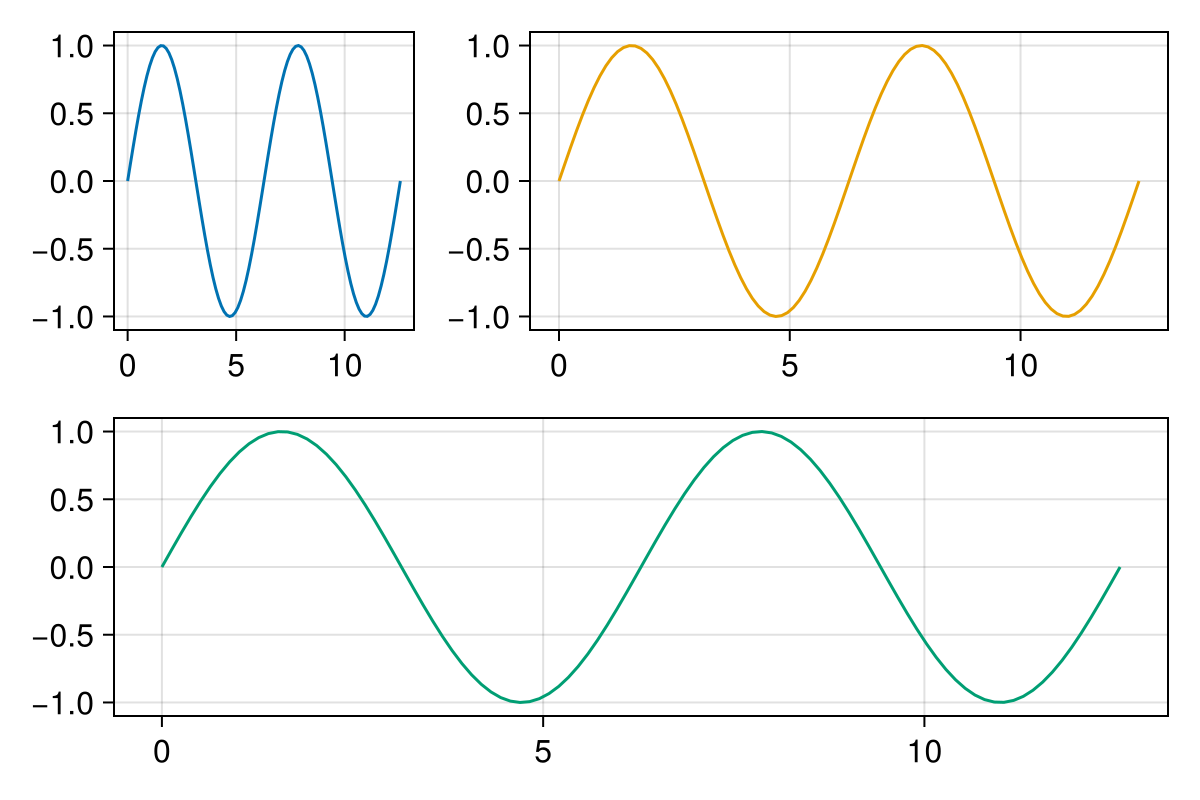

In [19]:
lines(fig[2, 1:3], x, y, color = Cycled(3))
fig

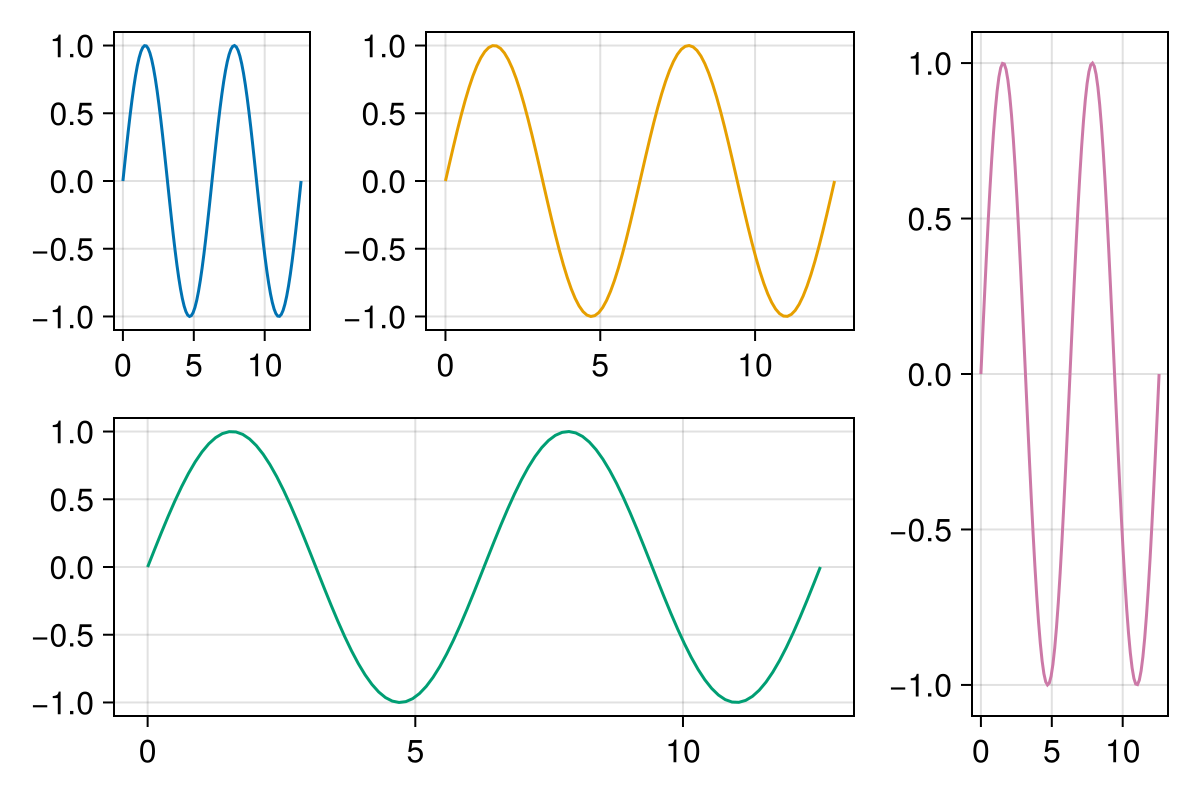

In [20]:
lines(fig[:, 4], x, y, color = Cycled(4))
fig

## Legends and colorbars

The `Axis` structure we have encountered above is a `Block` in the context of Makie. Two more `Block`s that are typically useful in scientific visualizations are the `Legend` and the `Colorbar`. Just like an `Axis` they could be placed arbitrarily and anywhere in a figure, even on top of existing axes.

### Legend

Legend has a simple automated way of being created.
You can assign a label to each plotted element of an axes by providing a value to the keyword `label`.

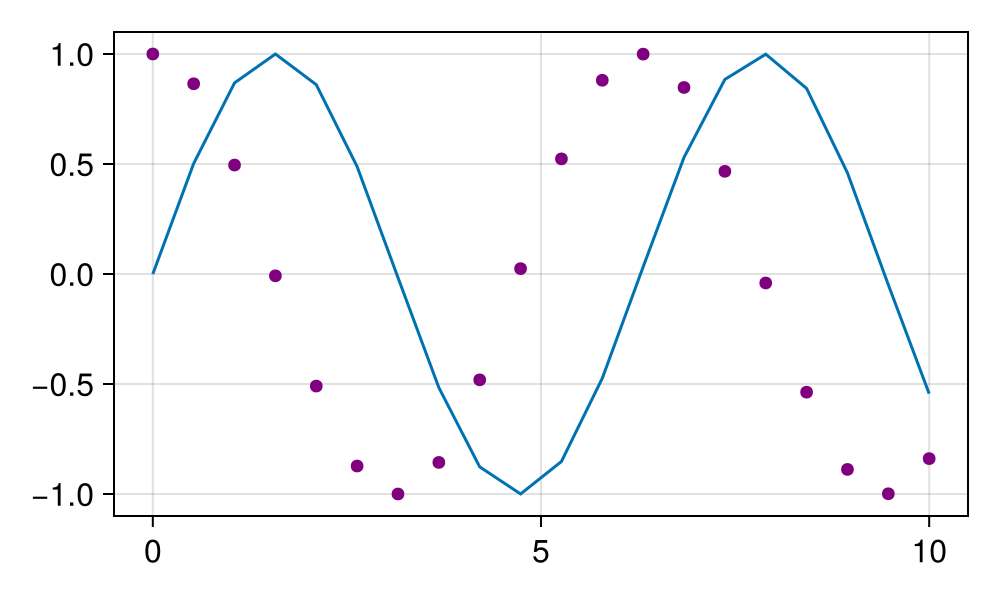

In [21]:
x = range(0, 10; length = 20)
lines(x, sin; label = "sin")  # makes a figure
scatter!(x, cos; label = "cos", color = "purple") # uses last-used figure
current_figure() # return (and hence display) last-used figure

To add an axis that automatically displays the labels we created, we use `axislegend`

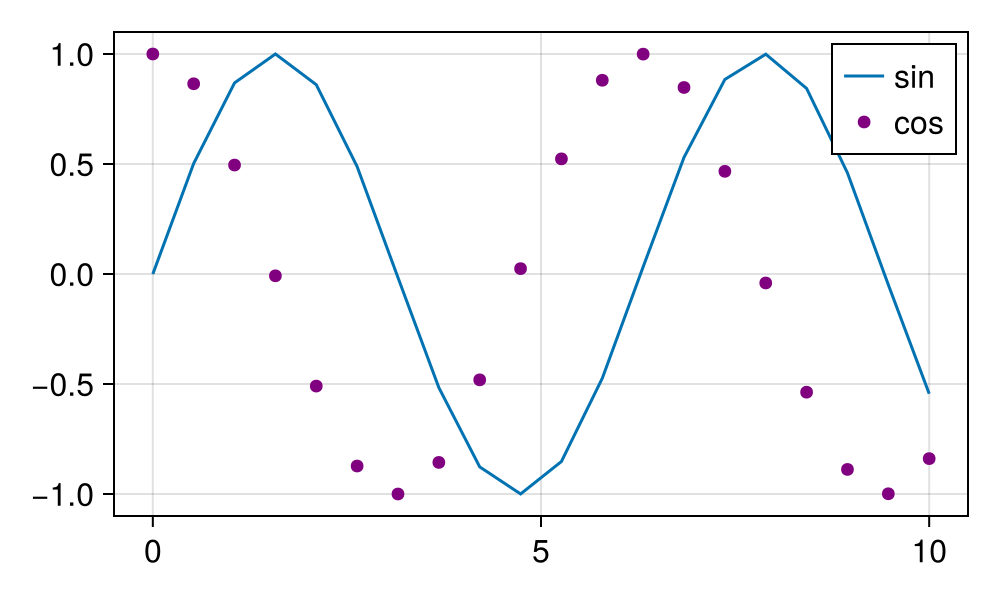

In [22]:
axislegend() # first argument is the axis to use. Defaults to last-used axis.
current_figure()

Of course, sometimes the manual creation and placement of a legend is necessary. In such a case, one collects the plotted objects that we haven't cared about so far, and gives them to a `Legend` object:

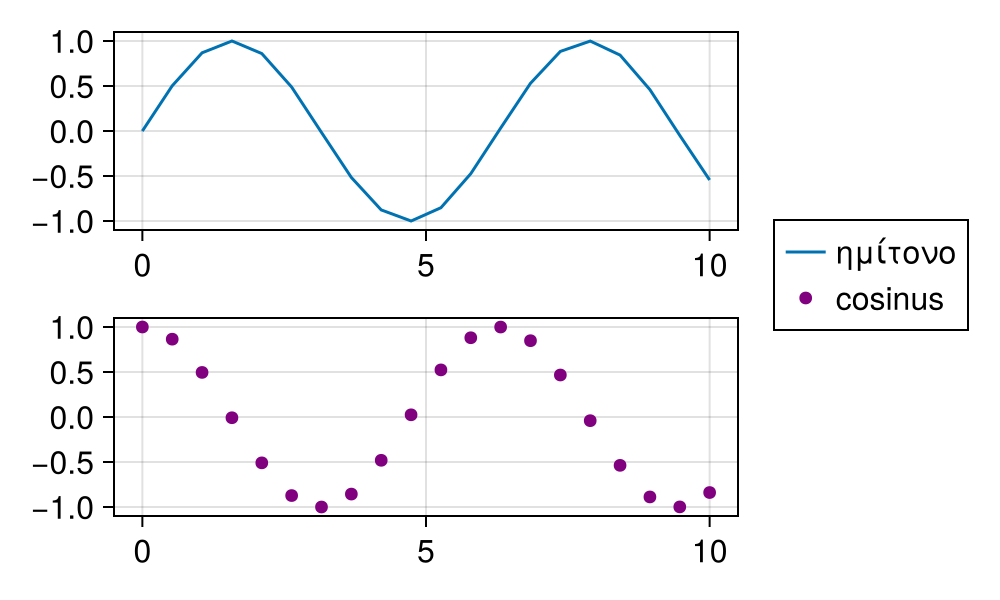

In [23]:
fig = Figure()
x = range(0, 10; length = 20)
ax1, li1 = lines(fig[1, 1], x, sin)
ax2, sc2 = scatter(fig[2, 1], x, cos; color = "purple")
Legend(fig[1:2, 2], [li1, sc2], ["ημίτονο", "cosinus"])
fig

## Learning more about Makie

Makie is the best the strongest the most amazing plotting framework (personal opinion). In this tini-tiny block we've only looked at a small subset of Makie's functionality. We haven't even touched the strongest feature of Makie, which is interactive visualizations and animations! In any case, you can learn more about Makie in the online documentation. For example:

- You can read about the different available plotting functions with visual examples visit the [Plotting Functions](https://docs.makie.org/stable/tutorials/getting-started#plotting) section.

- If you want to learn more about making complex figures with nested sublayouts, have a look at the [Layout Tutorial](https://docs.makie.org/stable/tutorials/layout-tutorial) section.

- If you're interested in creating interactive visualizations that use Makie's special `Observables` workflow, this is explained in more detail in the [Observables & Interaction](https://docs.makie.org/stable/explanations/observables#observables) section.

- Lastly, see the [Animations](https://docs.makie.org/stable/explanations/animation) section for making animated movies.

# Exercises - plotting

## Taylor expansion of sine

Plot the sine function and its progressive Taylor expansion series:

$$
\sin(x) \approx x - x^3/6 + x^5/120
$$

First, plot $\sin(x)$, then the progressively added Taylor terms: $x$, $x - x^3/6$, $x - x^3/6 + x^5/120$. For each plotted curve add a legend entry and in the end display the legend as well.



## Semi-transparent histograms

Use the following code to initialize some histogram data.

In [24]:
using Random: Xoshiro
rng = Xoshiro(1234)
xp1 = 0.2randn(rng, 10_000) .+ 0.5
p2 = 0.5randn(rng, 10_000)
edges = -2:0.1:2;

Using Makie's `hist` function, make the following plot:


![makie_ex_fig_1.png](../figures/makie_ex_fig_1.png)


_hint: to make transparent colors in Makie you provide a 2-tuple of the color and the alpha transparency value as the `color` keyword, such as `color = ("red", 0.75)`._

## Cool spiral


Pick 6 colors that you like and make the following figure:

![makie_ex_fig_2.png](../figures/makie_ex_fig_2.png)


_hint 1: The colored rectangles are just colored `Box` `Block`s. Instead of initializing an axis, you create a `Box` object, with the same syntax, at the location of interest. E.g., the first box is done with the code:_

```julia
Box(fig[1, 1:2]; color = "something", strokewidth = 0)
```

_hint 2: You can make axes on top of other elements. To make the line plot on top of the boxes, you first initialize the line data using_
```julia
n = 4
t = 0:0.01:2n*π
x = (2n*π .- t) .* cos.(t)
y = (2n*π .- t) .* sin.(t)
```
_and then make an axis over the whole figure `Axis(fig[:, :])` to plot in. To remove the spines of the axis use the functions `hidedecorations!` and `hidespines!`_.
